# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h) 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

C:\Users\kalai\AppData\Local\Temp\ipykernel_18932\4168292592.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


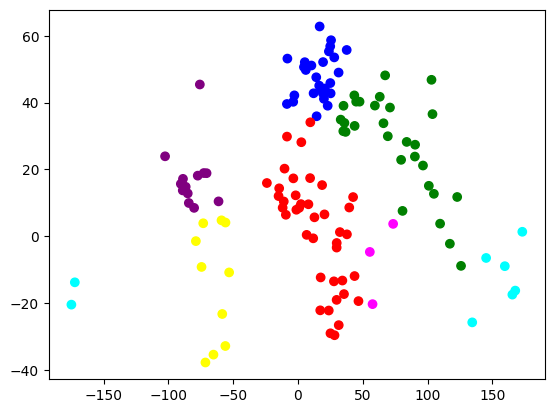

In [40]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))


**QUESTION 1**

Identify each class with the plot colors.

What do the coordinates correspond to?

We represent the data according 2 features : 'Longitude' and 'Latitude' so the different clusters represent a continent.
Purple - North America 

Yellow - South America  
Blue - Europe 
Red - Africa
Green - Asia
Cyan - Oceania
The x axis represents 'Longitude' and y axis represents 'Latitude'.


**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from 'C:\\Users\\kalai\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

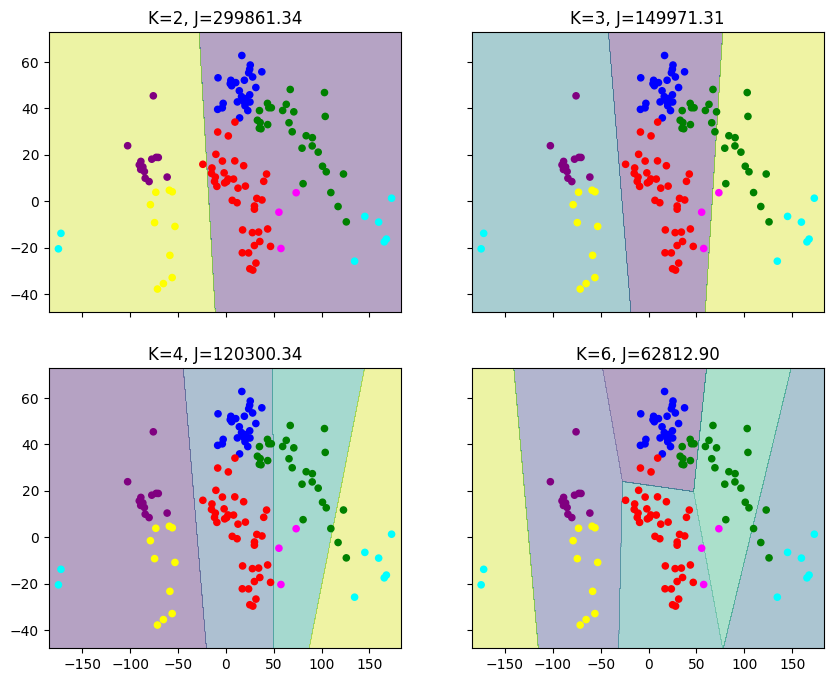

In [41]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?

Which is the main problem with the mercator representation for continent detection?

Inertia enables to measure how well a dataset was clustered with kmeans. It calcules the sum over the squarred-distance between a sample belonging to a sample and the centroid of the cluster. The higher the inertia, the less appropriate is the clustering. However, Inertia does not take in count the density of the clusters and the distance between clusters. (sklearn)


A better metric could be silhouette score which takes into account the inertia but also the distance between different clusters. 

The main problem with the mercator representation is the high variance for features. This type of representation distorts distances due to the cylindrical cartographic representation. Moreover, there are many merator representations centered on different countries which shift the representation. The representation above is centered on Europe but 2 countries from Oceania seems to be far away from the others but, in reality, these countries are close.

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

C:\Users\kalai\AppData\Local\Temp\ipykernel_18932\2740928541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Longitude'] = ((df1['Longitude']-30 + 180) % 360) - 180
C:\Users\kalai\AppData\Local\Temp\ipykernel_18932\2740928541.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df1['Continent'].replace(


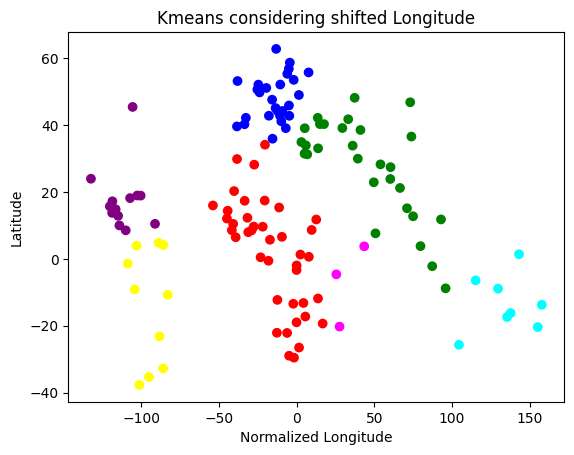

In [42]:
# Recentrer les longitudes sur [-180, 180] puis décaler de 30°
df1['Longitude'] = ((df1['Longitude']-30 + 180) % 360) - 180


# Extraire X, Y
df_X = df1[['Longitude', 'Latitude']]
df_Y = df1['Continent'].replace(
    ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'],
    [0, 1, 2, 3, 4, 5, 6]
).to_numpy()

np1 = df_X.to_numpy()

plt.scatter(df1['Longitude'], df1['Latitude'], 
            c=df_Y, 
            cmap=matplotlib.colors.ListedColormap(
                ['red','green','blue','purple','yellow','magenta','cyan'])
           )
plt.xlabel("Normalized Longitude")
plt.ylabel("Latitude")
plt.title('Kmeans considering shifted Longitude')
plt.show()



**QUESTION 3**

What are the advantages of this normalization?

It aims at reducing the dispersion. The 2 points from Oceania (cyan) were represented on the left so this normalization enables to cluster easier.

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

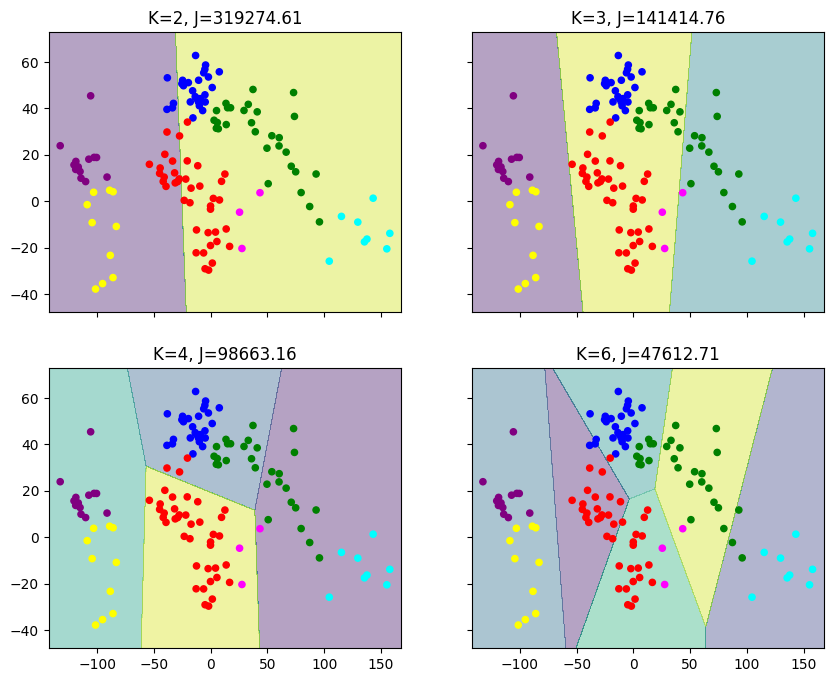

In [43]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

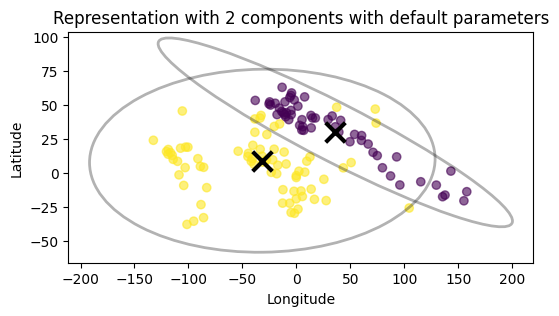

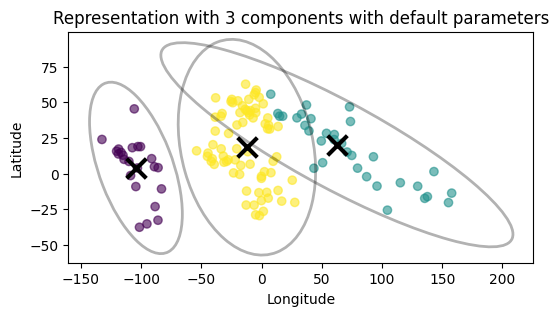

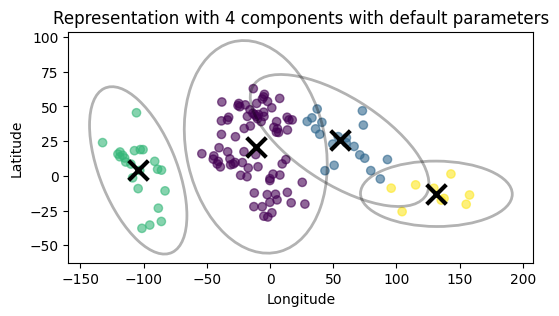

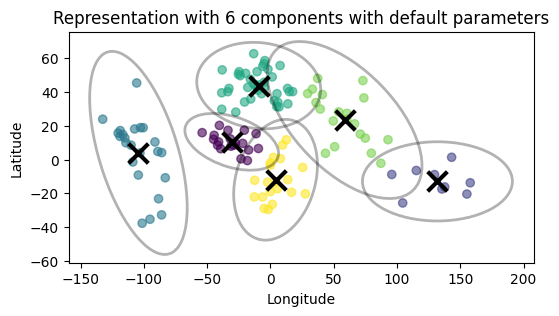

In [44]:
from sklearn.mixture import GaussianMixture
from matplotlib import patches
n_compo = [2,3,4,6]
np_x = df_X.to_numpy()
for component in n_compo:
    mel_gauss = GaussianMixture(n_components = component)
    mel_gauss.fit(df_X)
    predictions = mel_gauss.predict(df_X)

    moy_gauss = mel_gauss.means_
    moy_cov = mel_gauss.covariances_
    plt.figure(figsize=(6, 3))
    
    plt.scatter(np_x[:,0], np_x[:,1], c=predictions, alpha=0.6)

#plotting the ellipses
    for i in range(component):
        eigenvals, eigenvecs = np.linalg.eig(moy_cov[i])
        angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
        
        ellipse = patches.Ellipse(
            moy_gauss[i], 
            width=2*3*np.sqrt(eigenvals[0]),  
            height=2*3*np.sqrt(eigenvals[1]), 
            angle=angle, 
            alpha=0.3,
            fill=False,
            edgecolor='black',
            linewidth=2
        )
        plt.gca().add_patch(ellipse)
        plt.scatter(moy_gauss[i, 0], moy_gauss[i, 1], 
                   marker='x', s=200, linewidths=3, color='black')
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f'Representation with {component} components with default parameters') 
    plt.show()



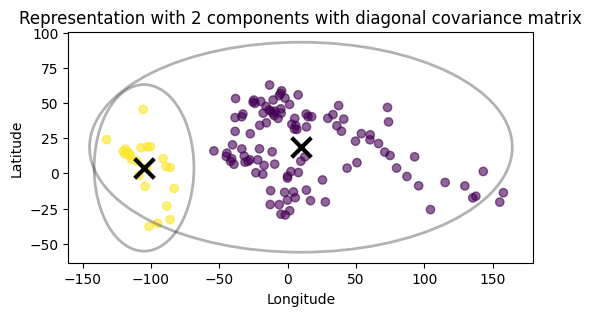

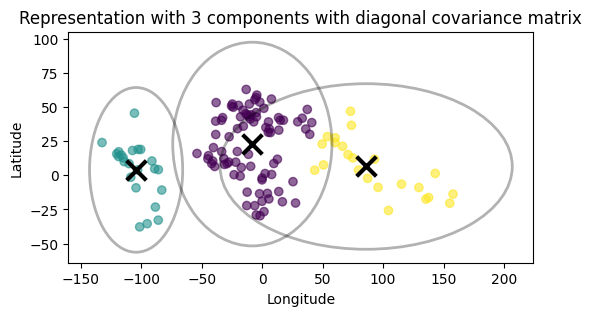

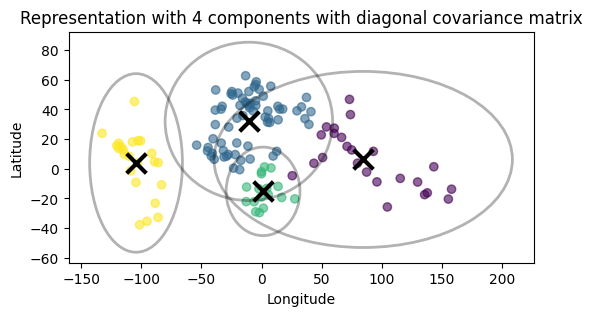

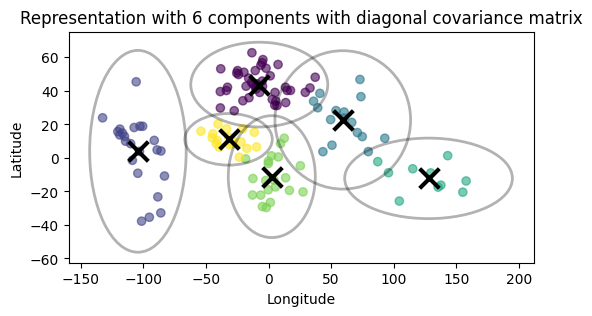

In [45]:
for component in n_compo:
    mel_gauss = GaussianMixture(n_components = component, covariance_type= 'diag')
    mel_gauss.fit(df_X)
    predictions = mel_gauss.predict(df_X)

    moy_gauss = mel_gauss.means_
    moy_cov = mel_gauss.covariances_
    plt.figure(figsize=(6, 3))
    
    plt.scatter(np_x[:,0], np_x[:,1], c=predictions, alpha=0.6)


    for i in range(component):
        cov_matrix = np.diag(moy_cov[i])  
        eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
        angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
        
        ellipse = patches.Ellipse(
            moy_gauss[i], 
            width=2*3*np.sqrt(eigenvals[0]),  
            height=2*3*np.sqrt(eigenvals[1]), 
            angle=angle, 
            alpha=0.3,
            fill=False,
            edgecolor='black',
            linewidth=2
        )
        plt.gca().add_patch(ellipse)
        
        plt.scatter(moy_gauss[i, 0], moy_gauss[i, 1], 
                   marker='x', s=200, linewidths=3, color='black')
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f'Representation with {component} components with diagonal covariance matrix') 
    plt.show()


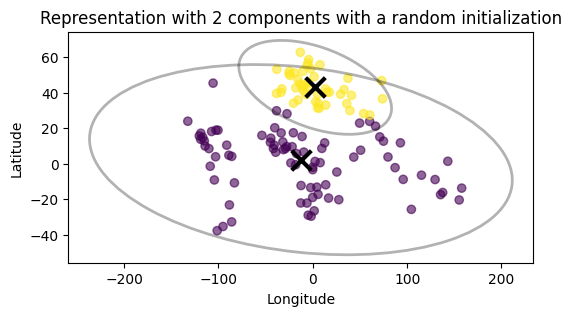

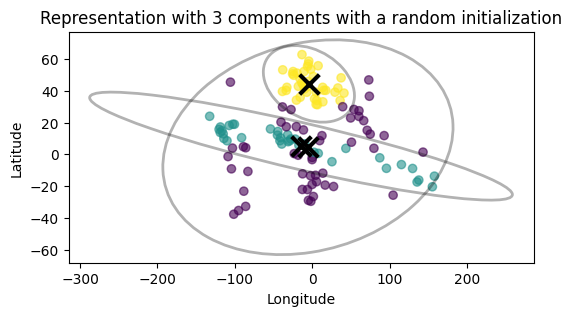

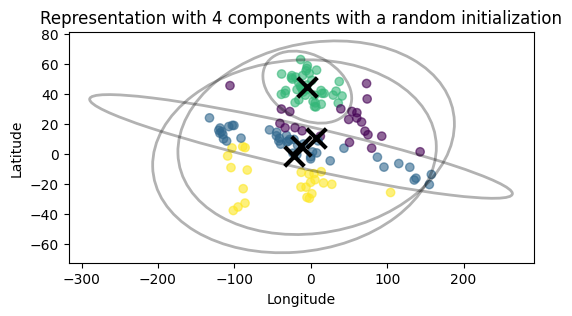

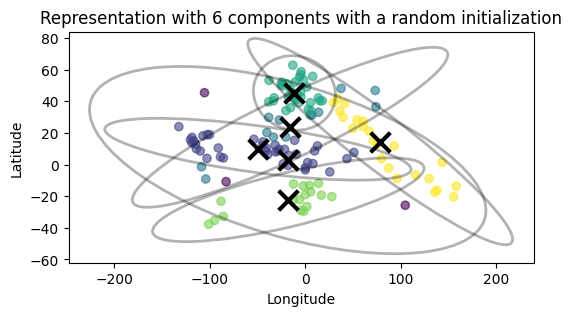

In [46]:
from sklearn.mixture import GaussianMixture
from matplotlib import patches
n_compo = [2,3,4,6]
np_x = df_X.to_numpy()
for component in n_compo:
    mel_gauss = GaussianMixture(n_components = component,init_params = 'random')
    mel_gauss.fit(df_X)
    predictions = mel_gauss.predict(df_X)

    moy_gauss = mel_gauss.means_
    moy_cov = mel_gauss.covariances_
    plt.figure(figsize=(6, 3))
    
    plt.scatter(np_x[:,0], np_x[:,1], c=predictions, alpha=0.6)


    for i in range(component):
        eigenvals, eigenvecs = np.linalg.eig(moy_cov[i])
        angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
        
        ellipse = patches.Ellipse(
            moy_gauss[i], 
            width=2*3*np.sqrt(eigenvals[0]),  
            height=2*3*np.sqrt(eigenvals[1]), 
            angle=angle, 
            alpha=0.3,
            fill=False,
            edgecolor='black',
            linewidth=2
        )
        plt.gca().add_patch(ellipse)
        
        plt.scatter(moy_gauss[i, 0], moy_gauss[i, 1], 
                   marker='x', s=200, linewidths=3, color='black')
    
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f'Representation with {component} components with a random initialization') 
    plt.show()



**QUESTION 4**

Which is the best method to detect continents?

For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

C:\Users\kalai\AppData\Local\Temp\ipykernel_18932\2242238302.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y_america = df_america[['Continent']].replace(


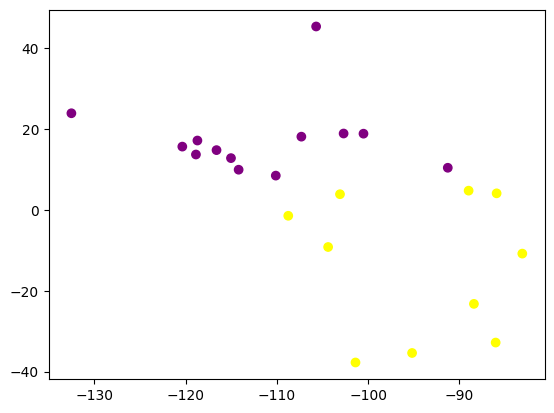

In [47]:

df_america = df1[df1['Continent'].isin(['North America', 'South America'])]

df_X_america = df_america[['Longitude', 'Latitude']]
df_Y_america = df_america[['Continent']].replace(
    ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'],
    [0, 1, 2, 3, 4, 5, 6]
)

np_america = df_X_america.to_numpy()
np_Y_america = df_Y_america.to_numpy().reshape(-1)

plt.scatter(
    np_america[:,0],
    np_america[:,1],
    c=np_Y_america,
    cmap=matplotlib.colors.ListedColormap(['purple','yellow'])
)
plt.show()


**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

In [48]:
caribbean_nations = [
    'Cuba', 'Jamaica', 'Haiti', 'Dominican Republic', 
    'Bahamas', 'Trinidad and Tobago', 'Barbados', 
    'Saint Lucia', 'Grenada', 'Saint Vincent and the Grenadines',
    'Antigua and Barbuda', 'Dominica', 'Saint Kitts and Nevis'
]
df_caribbean = df[df['Country'].isin(caribbean_nations)]
print(f"Caribbean independent nations' samples: {len(df_caribbean)}")

Caribbean independent nations' samples: 42


The caribbean independant nations are : Antigua-et-Barbuda, Bahamas, Barbade, Cuba, Dominique, la République dominicaine, Grenade, Haïti, la Jamaïque, Saint- Kitts-et-Nevis, Sainte -Lucie, Sainte-Lucie. The dataset 'Life Expectancy' got samples for each of these nations. 

**QUESTION 5**

Which is the outlier of this clustering problem?

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

C:\Users\kalai\AppData\Local\Temp\ipykernel_18932\1005647255.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


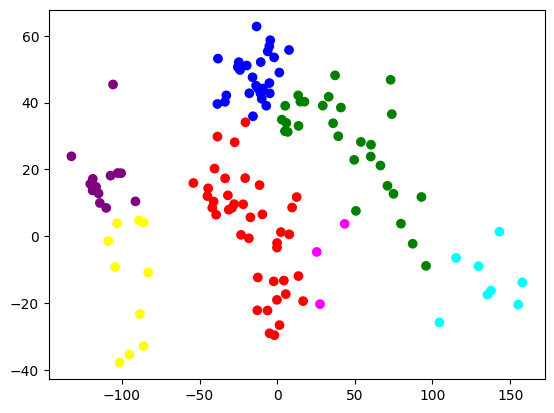

In [49]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()



In [50]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


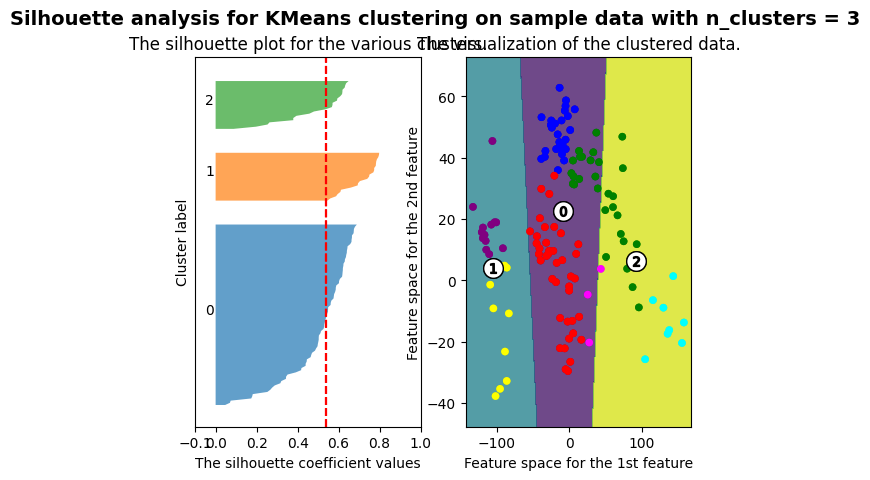

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is : 0.45000916926274387


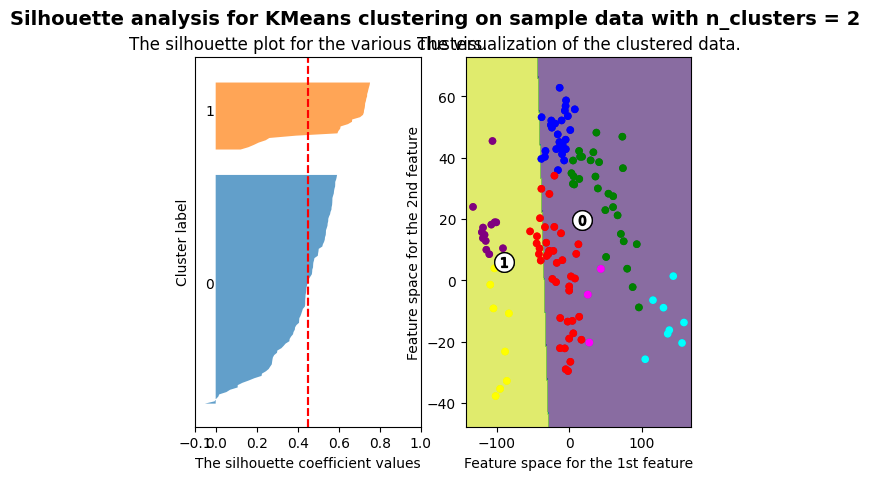

For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


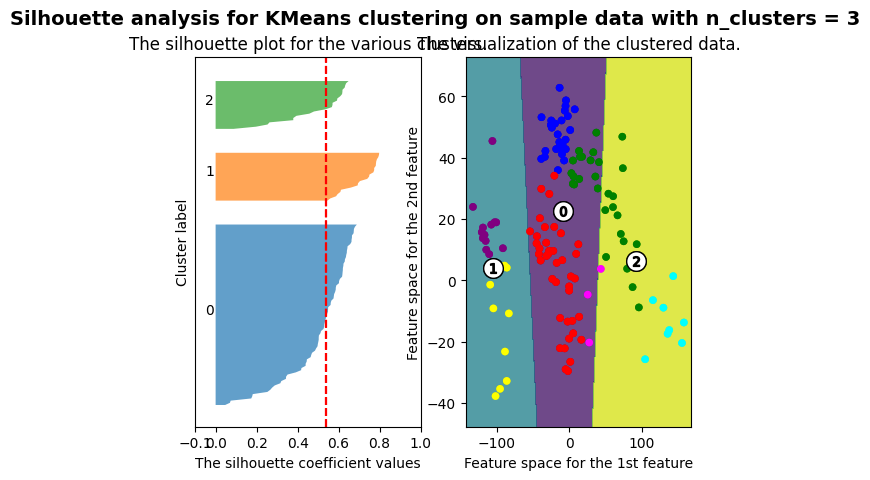

For n_clusters = 4 The average silhouette_score is : 0.4875009627702222


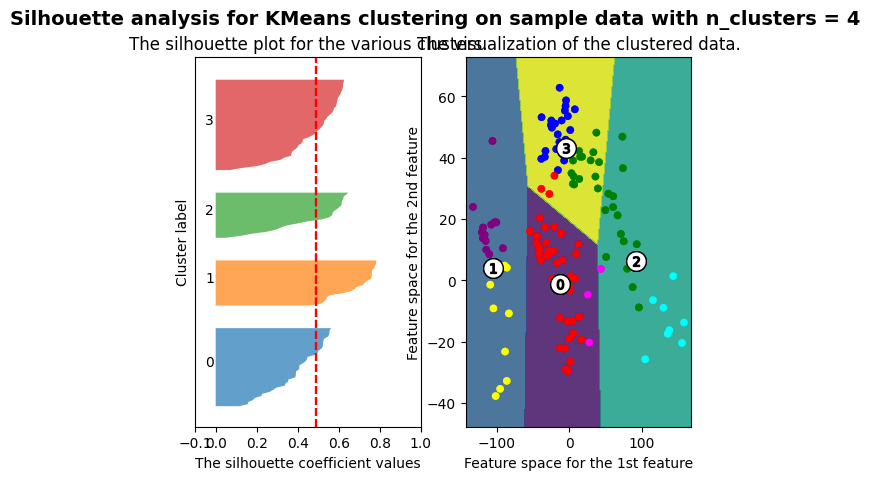

For n_clusters = 6 The average silhouette_score is : 0.5172067215678542


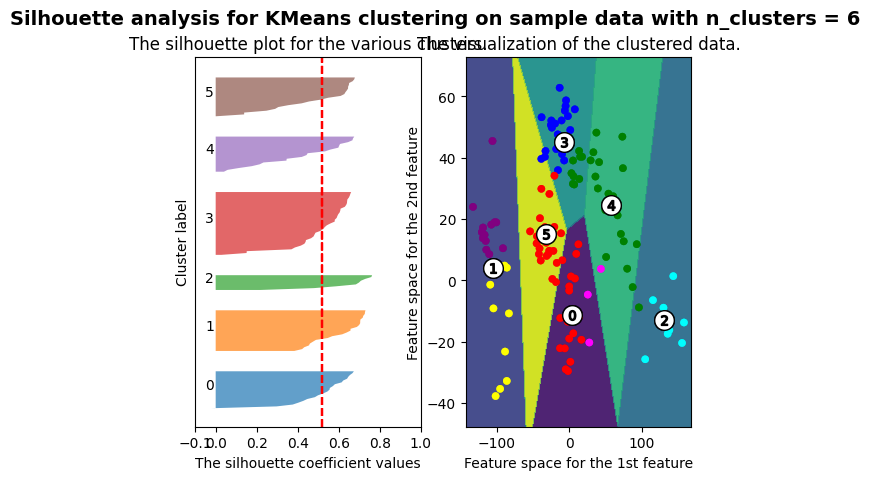

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt


Kclusters = [2,3,4,6]
for K in Kclusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(np1) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)

    silhouette_avg = silhouette_score(np1, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(np1, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax2.contourf(xx, yy, Z, alpha=0.4)
        ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                    s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % K,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

**Question 6** 

According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.

K = 4
Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [53]:
from sklearn.metrics import homogeneity_score, accuracy_score

Kclusters = [2,3,4,6,7,8,9,10,11,12,18]
for K in Kclusters:
    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1)
    h_score = homogeneity_score(np_Y,cluster_labels)
    acc = accuracy_score(np_Y, cluster_labels)
    print(f'Homogeneity score for {K} clusters is {h_score} and the accuracy is {acc}')




Homogeneity score for 2 clusters is 0.23248448940225225 and the accuracy is 0.25384615384615383
Homogeneity score for 3 clusters is 0.4245233692113754 and the accuracy is 0.3076923076923077
Homogeneity score for 4 clusters is 0.6375598863778785 and the accuracy is 0.2846153846153846
Homogeneity score for 6 clusters is 0.7284884105209726 and the accuracy is 0.14615384615384616
Homogeneity score for 7 clusters is 0.8330501289263336 and the accuracy is 0.14615384615384616
Homogeneity score for 8 clusters is 0.869152363370373 and the accuracy is 0.14615384615384616
Homogeneity score for 9 clusters is 0.8765301921528702 and the accuracy is 0.14615384615384616
Homogeneity score for 10 clusters is 0.8837296087967772 and the accuracy is 0.06153846153846154
Homogeneity score for 11 clusters is 0.8507879747448813 and the accuracy is 0.06153846153846154
Homogeneity score for 12 clusters is 0.8726088719983501 and the accuracy is 0.06153846153846154
Homogeneity score for 18 clusters is 0.9326603010

Surclustering?

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
As we got 7 labels representing the different continents, doing Kmeans with less than at least 4 clusters give a unsufficient homogeneity.

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

In [54]:
#Question 1

df_alcohol = df[(df['Alcohol'] > 10) & (df['Year'] == 2000)]
df_alcohol.head()


,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
143,Austria,14.126476,47.585494,Europe,2000,Developed,78.1,96.0,0,13.20,...,71.0,1.60,81.0,0.1,24517.26745,811566.0,1.7,1.9,0.833,15.4
239,Belarus,28.032093,53.531314,Europe,2000,Developing,68.0,247.0,1,12.98,...,99.0,6.13,99.0,0.1,1276.28834,997961.0,2.7,2.8,0.675,13.1
255,Belgium,4.640651,50.639816,Europe,2000,Developed,77.6,11.0,1,11.21,...,96.0,8.12,95.0,0.1,2327.45910,125125.0,0.8,0.8,0.869,18.0
945,France,-2.761729,42.173440,Europe,2000,Developing,78.8,13.0,3,13.63,...,98.0,9.77,97.0,0.1,22465.64184,6912498.0,0.7,0.6,0.844,15.7
1009,Germany,10.385781,51.106982,Europe,2000,Developed,78.0,95.0,3,12.91,...,94.0,1.10,9.0,0.1,23718.74670,8221158.0,1.2,1.2,0.855,16.2


In [55]:
df_alcohol_sorted = df_alcohol.sort_values(by='Alcohol', ascending= False)
print(df_alcohol_sorted[:10])


         Country  Longitude   Latitude Continent  Year      Status  \
945       France  -2.761729  42.173440    Europe  2000  Developing   
143      Austria  14.126476  47.585494    Europe  2000   Developed   
1553  Luxembourg   6.071822  49.767254    Europe  2000   Developed   
239      Belarus  28.032093  53.531314    Europe  2000  Developing   
1009     Germany  10.385781  51.106982    Europe  2000   Developed   
2070    Portugal  -8.501044  39.595507    Europe  2000   Developed   
255      Belgium   4.640651  50.639816    Europe  2000   Developed   
2440       Spain  -3.647550  40.244487    Europe  2000   Developed   
2134     Romania  24.972930  45.852431    Europe  2000   Developed   

      Life_expectancy  Adult_mortality  Infant_deaths  Alcohol  ...  Polio  \
945              78.8             13.0              3    13.63  ...   98.0   
143              78.1             96.0              0    13.20  ...   71.0   
1553             77.8             98.0              0    13.14  .

In [56]:
df_alcohol_sorted.shape

(9, 25)

France, Austria, Luxembourg, Belarus are the countries which are heavily concerned by an Alcohol issue.

In [57]:
df_alcohol_sorted = df_alcohol_sorted.select_dtypes(include='number') 
df_alcohol_sorted.shape

(9, 22)

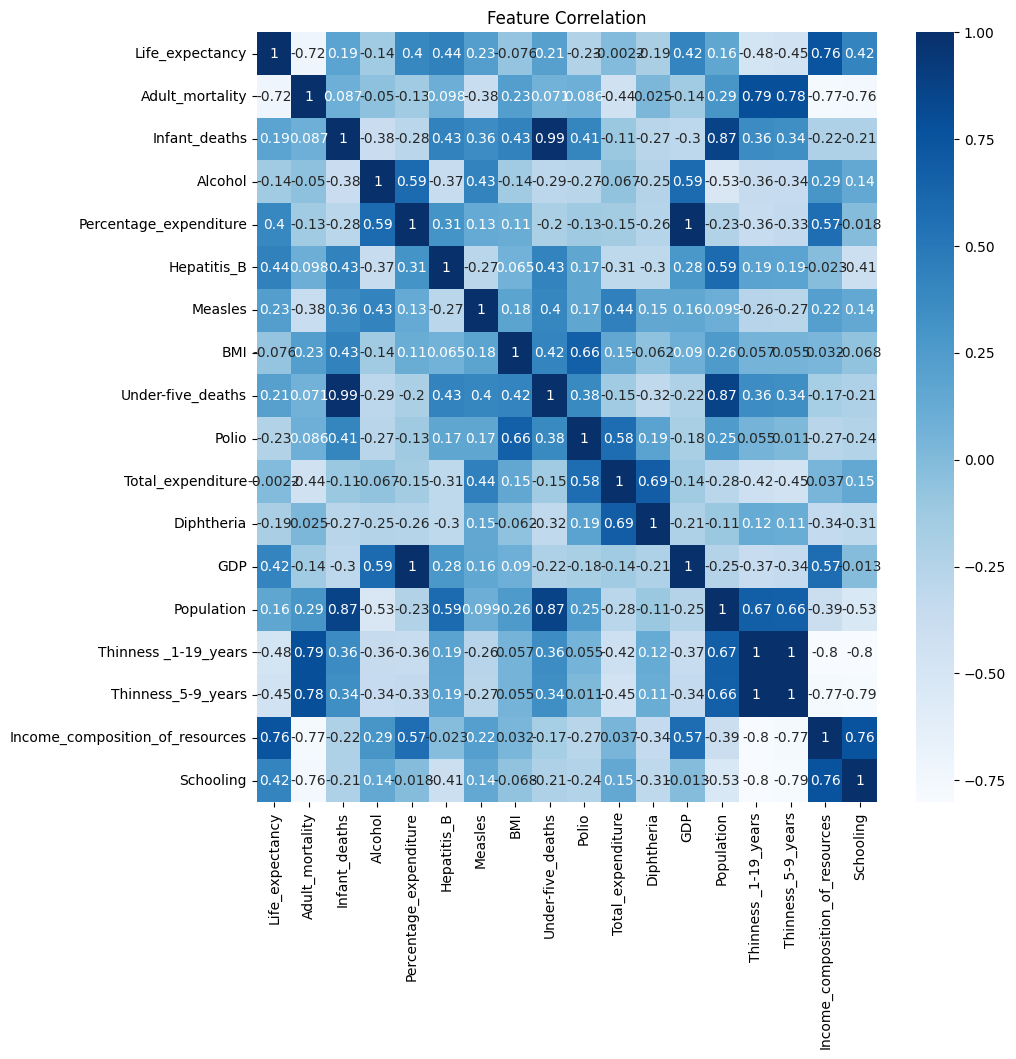

In [66]:
import seaborn as sns
df_alcohol_sorted = df_alcohol_sorted.select_dtypes(include='number')
df_alc_simp = df_alcohol_sorted.copy()
df_alc_simp = df_alc_simp.drop(columns = ['Year', 'HIV_AIDS', 'Longitude', 'Latitude'])
df_alc_simp = pd.get_dummies(df_alc_simp)
plt.figure(figsize=(10,10))
sns.heatmap(df_alc_simp.corr(), annot= True, cmap='Blues')
plt.title('Feature Correlation')
plt.show()



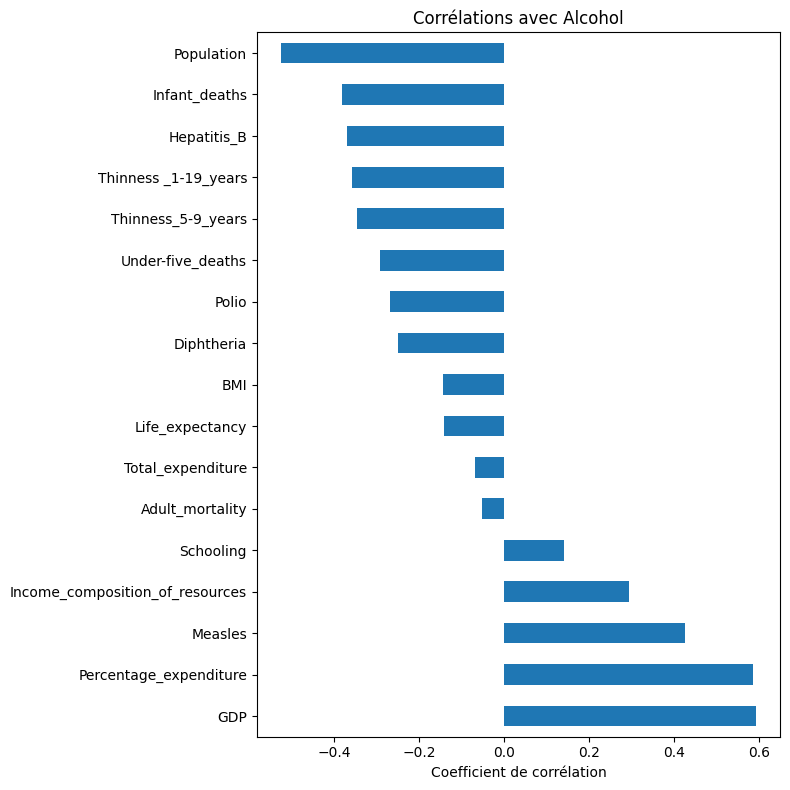

In [ ]:
correlation_alcohol = df_alc_simp.corr()['Alcohol'].sort_values(ascending = False)
plt.figure(figsize=(8, 8))
correlation_alcohol.drop('Alcohol').plot(kind='barh') 
plt.title('Corrélations avec Alcohol')
plt.xlabel('Coefficient de corrélation')
plt.tight_layout()
plt.show()

In [79]:
countries_high_alcohol = df_alcohol['Country'].unique()
print(countries_high_alcohol)
df_alcohol_trend = df[(df['Country'].isin(countries_high_alcohol)) & (df['Year'] < 2015) ]
df_alcohol_trend.head()

['Austria' 'Belarus' 'Belgium' 'France' 'Germany' 'Luxembourg' 'Portugal'
 'Romania' 'Spain']


,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
129,Austria,14.126476,47.585494,Europe,2014,Developed,81.4,66.0,0,12.32,...,98.0,11.21,98.0,0.1,51322.63997,8541575.0,1.8,2.0,0.892,15.9
130,Austria,14.126476,47.585494,Europe,2013,Developed,81.1,68.0,0,11.82,...,95.0,11.14,95.0,0.1,554.71532,8479375.0,1.8,2.0,0.887,15.7
131,Austria,14.126476,47.585494,Europe,2012,Developed,88.0,7.0,0,12.26,...,92.0,11.17,92.0,0.1,48333.57273,8429991.0,1.8,2.0,0.884,15.7
132,Austria,14.126476,47.585494,Europe,2011,Developed,88.0,73.0,0,12.04,...,89.0,1.94,89.0,0.1,51126.74139,8391643.0,1.7,2.0,0.880,15.7
133,Austria,14.126476,47.585494,Europe,2010,Developed,84.0,75.0,0,12.10,...,86.0,11.17,86.0,0.1,46657.62900,836344.0,1.7,1.9,0.872,15.4


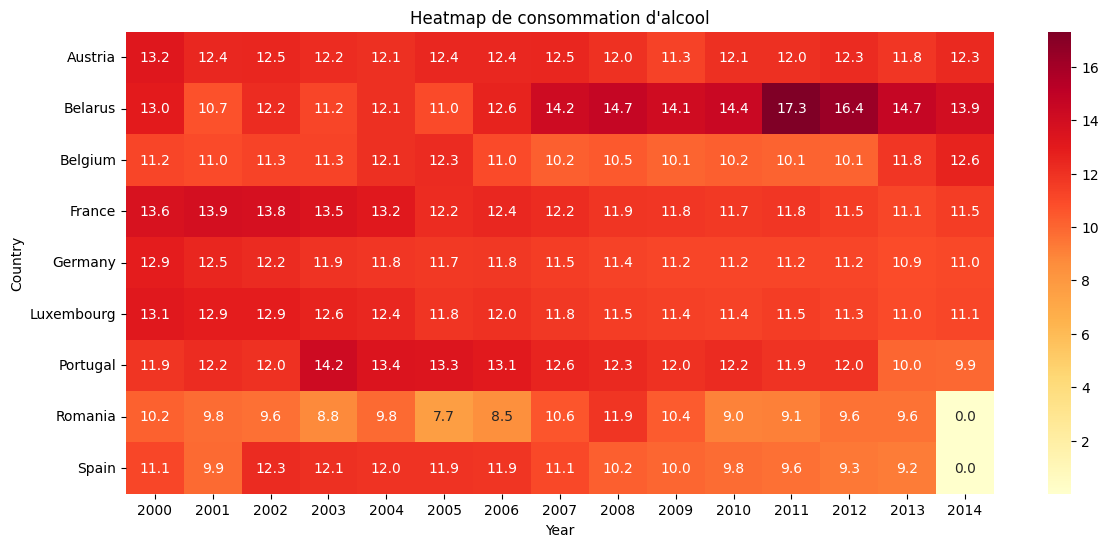

In [ ]:
pivot_data = df_alcohol_trend.pivot_table(values='Alcohol', index='Country', columns='Year')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Heatmap Alcohol consuption')
plt.show()

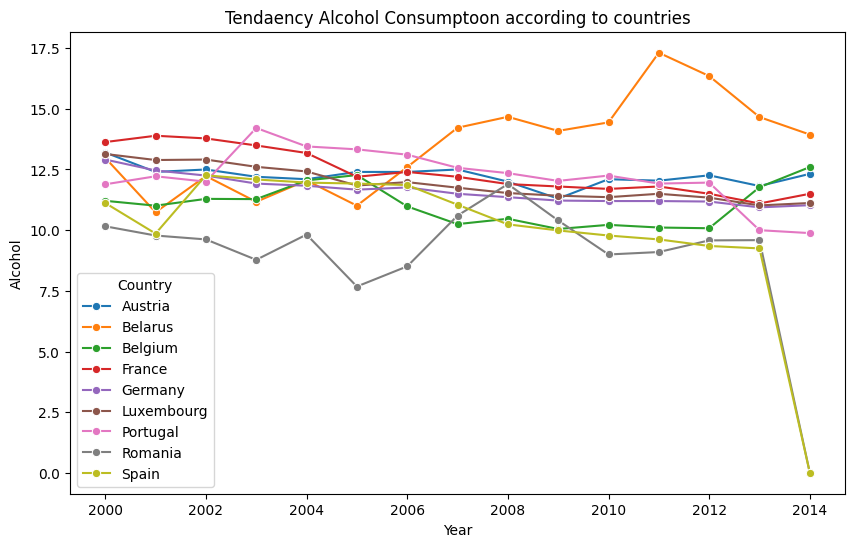

In [83]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_alcohol_trend, x='Year', y='Alcohol', hue='Country', marker='o')
plt.title('Tendaency Alcohol Consumptoon according to countries')
plt.show()